In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
entropy_results = pd.read_csv('full_entropy_results.csv')
entropy_results = entropy_results[(entropy_results['Key']!="log")&(entropy_results['File']!="Sepsis")]
entropy_results['Value'] = entropy_results['Value'].astype(float)
entropy_results['Key'] = entropy_results['Key'].str.replace("entropy","eventropy")

entropy_results = entropy_results.reset_index(drop=True)

In [38]:
entropy_results

File                               Key     Value
0                  BPIC15_1            eventropy_global_block    18.961
1                  BPIC15_1  eventropy_global_block_flattened    18.967
2                  BPIC15_1          eventropy_k_block_diff_1     6.942
3                  BPIC15_1          eventropy_k_block_diff_3     1.513
4                  BPIC15_1          eventropy_k_block_diff_5     0.600
..                      ...                               ...       ...
337    Receipt_WABO_CoSeLoG                   n_variants   116.000
338       RequestForPayment                          n_traces  6886.000
339       RequestForPayment                   n_variants    89.000
340  Sepsis_Cases_Event_Log                          n_traces  1050.000
341  Sepsis_Cases_Event_Log                   n_variants   846.000

[342 rows x 3 columns]

In [42]:
bpic_results = pd.read_csv("bpic_features.csv")
bpic_results = bpic_results.melt(id_vars=["log"], var_name="Key", value_name="Value")
bpic_results.rename(columns={"log": "File"}, inplace=True)
bpic_results = bpic_results[
    (bpic_results['File'].isin(entropy_results['File'].unique())) &
    (bpic_results['Key'].isin(entropy_results['Key'].unique()))
]
bpic_results = bpic_results.reset_index(drop = True)

In [43]:
bpic_results

File                         Key      Value
0              Sepsis_Cases_Event_Log                    n_traces   1050.000
1                            BPIC15_4                    n_traces   1053.000
2                   RequestForPayment                    n_traces   6886.000
3        BPI_Challenge_2017_Offer_log                    n_traces  42995.000
4                            BPIC15_5                    n_traces   1156.000
..                                ...                         ...        ...
337                          BPIC15_2  eventropy_prefix_flattened        NaN
338                BPI_Challenge_2017  eventropy_prefix_flattened        NaN
339              DomesticDeclarations  eventropy_prefix_flattened        NaN
340  BPI_Challenge_2013_open_problems  eventropy_prefix_flattened      6.568
341                          BPIC15_1  eventropy_prefix_flattened     14.346

[342 rows x 3 columns]

below implementations are used for all the vizualizations in the notebook

In [47]:
import pandas as pd

entropy_results = pd.read_csv('full_entropy_results.csv')
# Replace 'entropy' with 'eventropy' in 'Key' column
entropy_results['Key'] = entropy_results['Key'].str.replace("entropy", "eventropy")
# Filter out specific keys and 'Sepsis' from the DataFrame
entropy_results = entropy_results[~entropy_results['Key'].isin(["log", 'eventropy_global_block_flattened', 'eventropy_lempel_ziv_flattened', 'eventropy_prefix_flattened']) & (entropy_results['File'] != "Sepsis")]

# Convert 'Value' column to float
entropy_results['Value'] = entropy_results['Value'].astype(float)

# Reset index
entropy_results = entropy_results.reset_index(drop=True)


In [48]:
entropy_results

File                        Key     Value
0                  BPIC15_1     eventropy_global_block    18.961
1                  BPIC15_1   eventropy_k_block_diff_1     6.942
2                  BPIC15_1   eventropy_k_block_diff_3     1.513
3                  BPIC15_1   eventropy_k_block_diff_5     0.600
4                  BPIC15_1  eventropy_k_block_ratio_1     6.942
..                      ...                        ...       ...
280    Receipt_WABO_CoSeLoG            n_variants   116.000
281       RequestForPayment                   n_traces  6886.000
282       RequestForPayment            n_variants    89.000
283  Sepsis_Cases_Event_Log                   n_traces  1050.000
284  Sepsis_Cases_Event_Log            n_variants   846.000

[285 rows x 3 columns]

In [49]:
bpic_results = pd.read_csv("benchmark_features_final.csv")
bpic_results = bpic_results.melt(id_vars=["log"], var_name="Key", value_name="Value")
bpic_results.rename(columns={"log": "File"}, inplace=True)
bpic_results['Key'] = bpic_results['Key'].str.replace("entropy","eventropy")
bpic_results = bpic_results[
    (bpic_results['File'].isin(entropy_results['File'].unique())) &
    (bpic_results['Key'].isin(entropy_results['Key'].unique()))
]
bpic_results['Value'] = bpic_results['Value'].astype(float)
bpic_results = bpic_results.reset_index(drop = True)

In [50]:
bpic_results

File              Key       Value
0                            BPIC15_2         n_traces     832.000
1                Receipt_WABO_CoSeLoG         n_traces    1434.000
2                            BPIC15_3         n_traces    1409.000
3                  BPI_Challenge_2019         n_traces  251734.000
4                   RequestForPayment         n_traces    6886.000
..                                ...              ...         ...
280                         PermitLog  eventropy_knn_7       4.725
281                          BPIC15_1  eventropy_knn_7       4.931
282         InternationalDeclarations  eventropy_knn_7       3.986
283                BPI_Challenge_2017  eventropy_knn_7       6.297
284  BPI_Challenge_2013_open_problems  eventropy_knn_7       2.259

[285 rows x 3 columns]

### Distribution of entropies

better looking plot

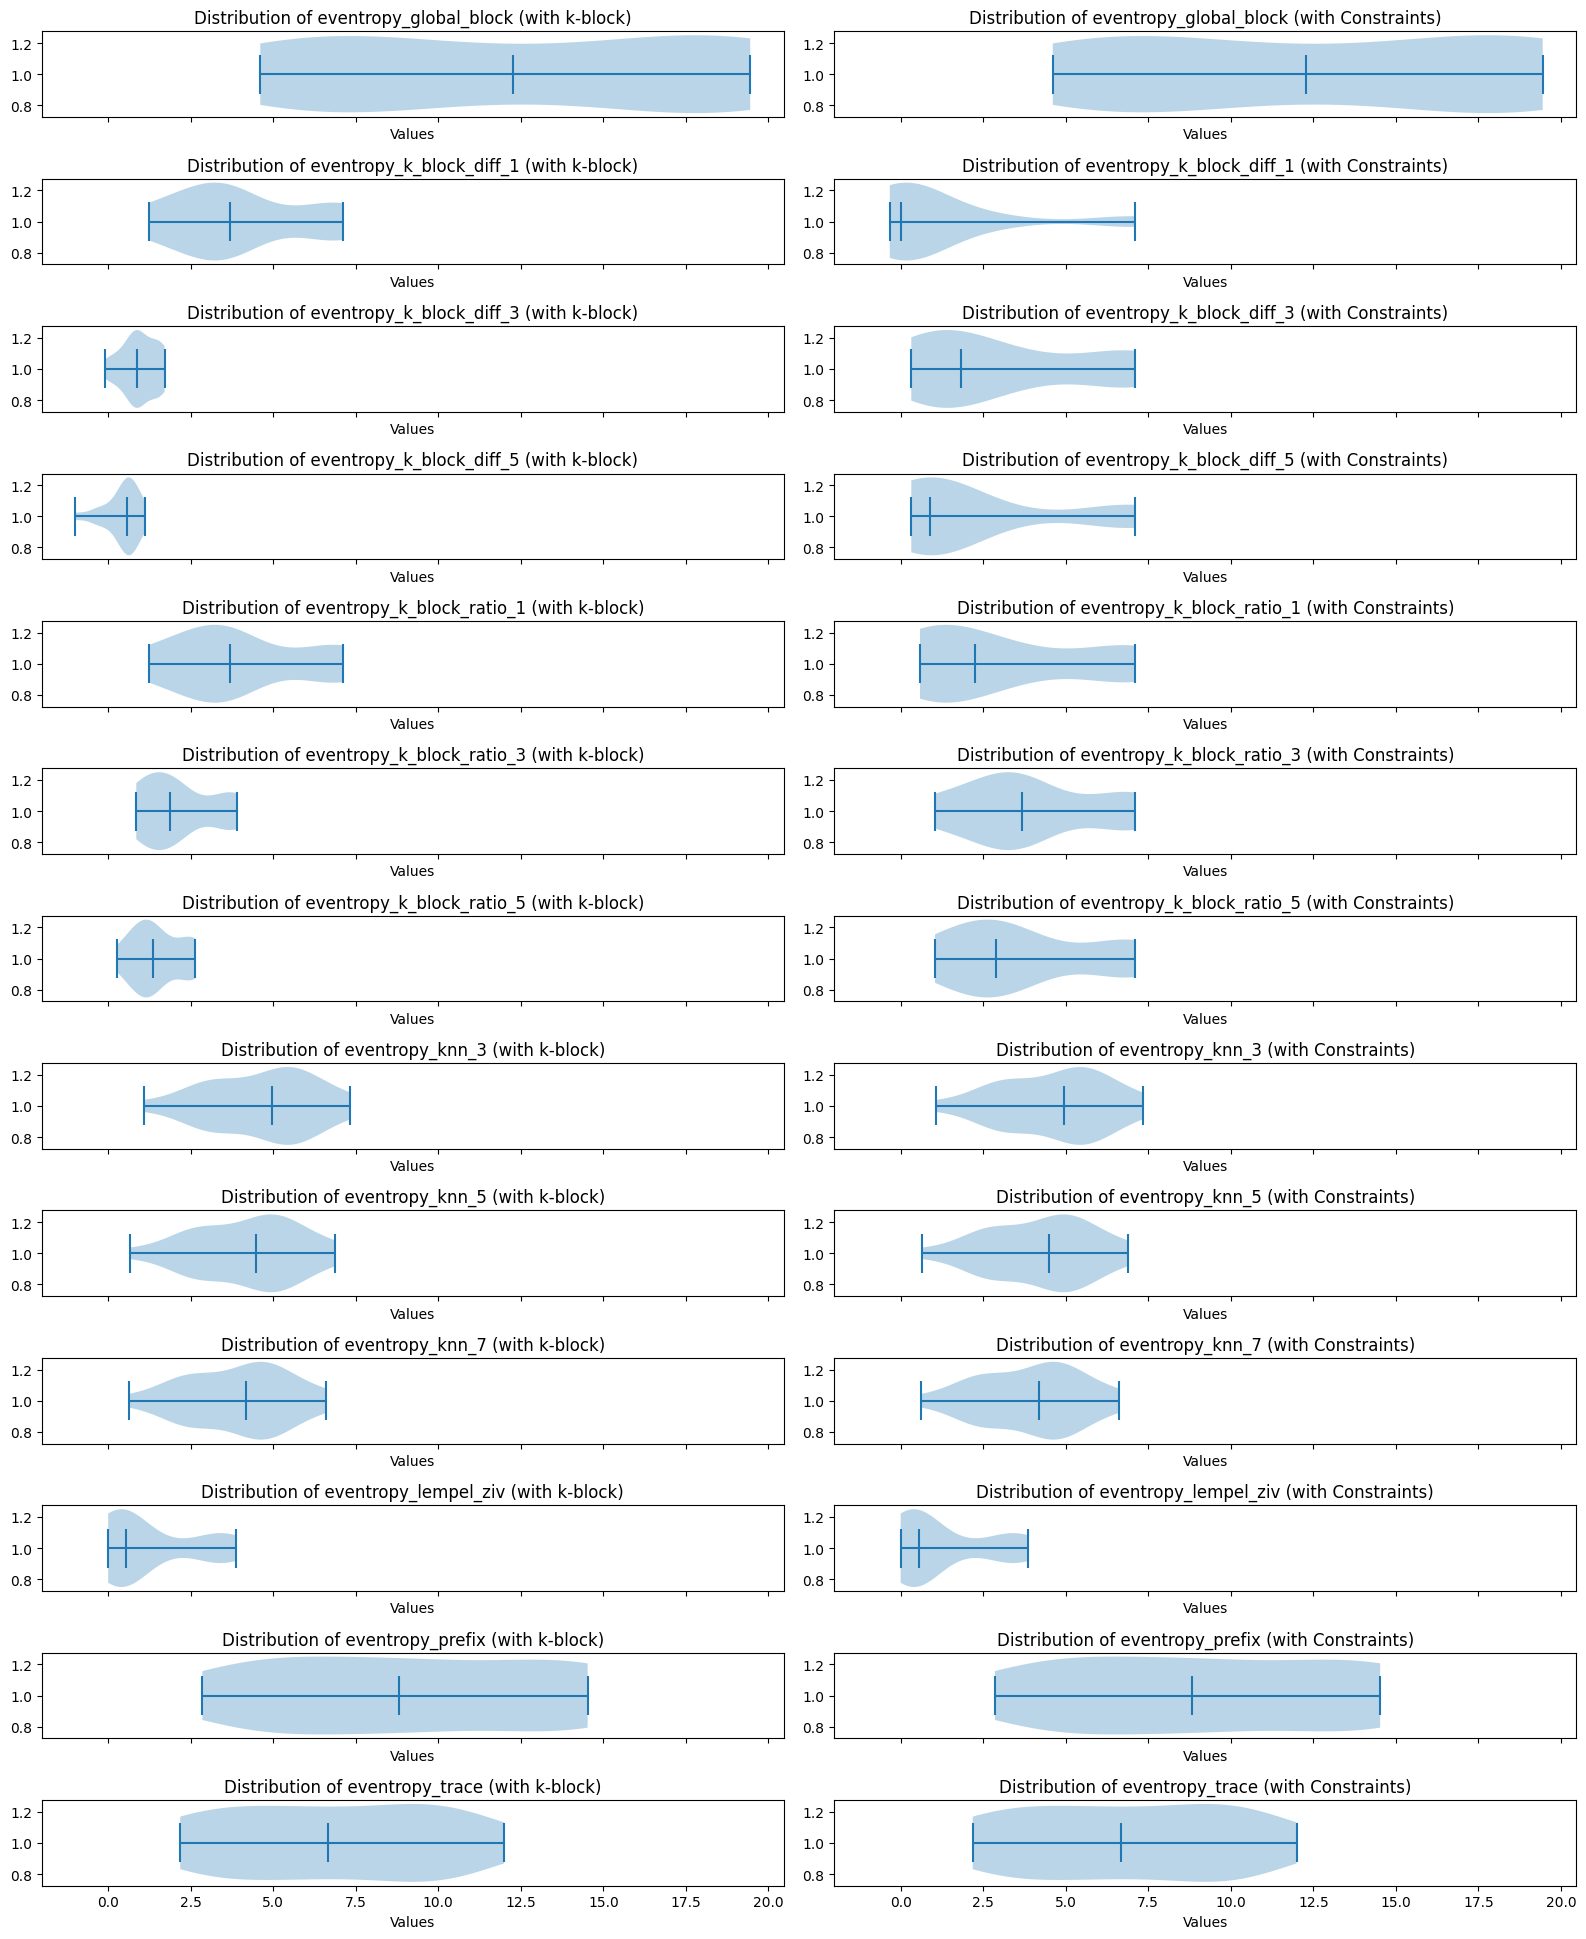

In [51]:
import matplotlib.pyplot as plt

# Your existing code...
unique_keys = entropy_results['Key'].unique()
unique_keys = unique_keys[(unique_keys != 'n_traces') & (unique_keys != 'n_variants')]

# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=len(unique_keys), ncols=2, figsize=(16, 1.5 * len(unique_keys)), sharex=True)

# Iterate over unique keys
for i, key in enumerate(unique_keys):
    # Plot each category's distribution on its own subplot for entropy results
    axes[i][0].violinplot(entropy_results[entropy_results['Key'] == key]['Value'], showmedians=True, vert=False)
    axes[i][0].set_title("Distribution of " + key + " (with k-block)")
    axes[i][0].set_xlabel('Values')  # Set x-label for the first subplot
    
    # Plot for bpic features
    axes[i][1].violinplot(bpic_results[bpic_results['Key'] == key]['Value'], showmedians=True, vert=False)
    axes[i][1].set_title("Distribution of " + key + " (with Constraints)")
    axes[i][1].set_xlabel('Values')  # Set x-label for the second subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


better informing plot

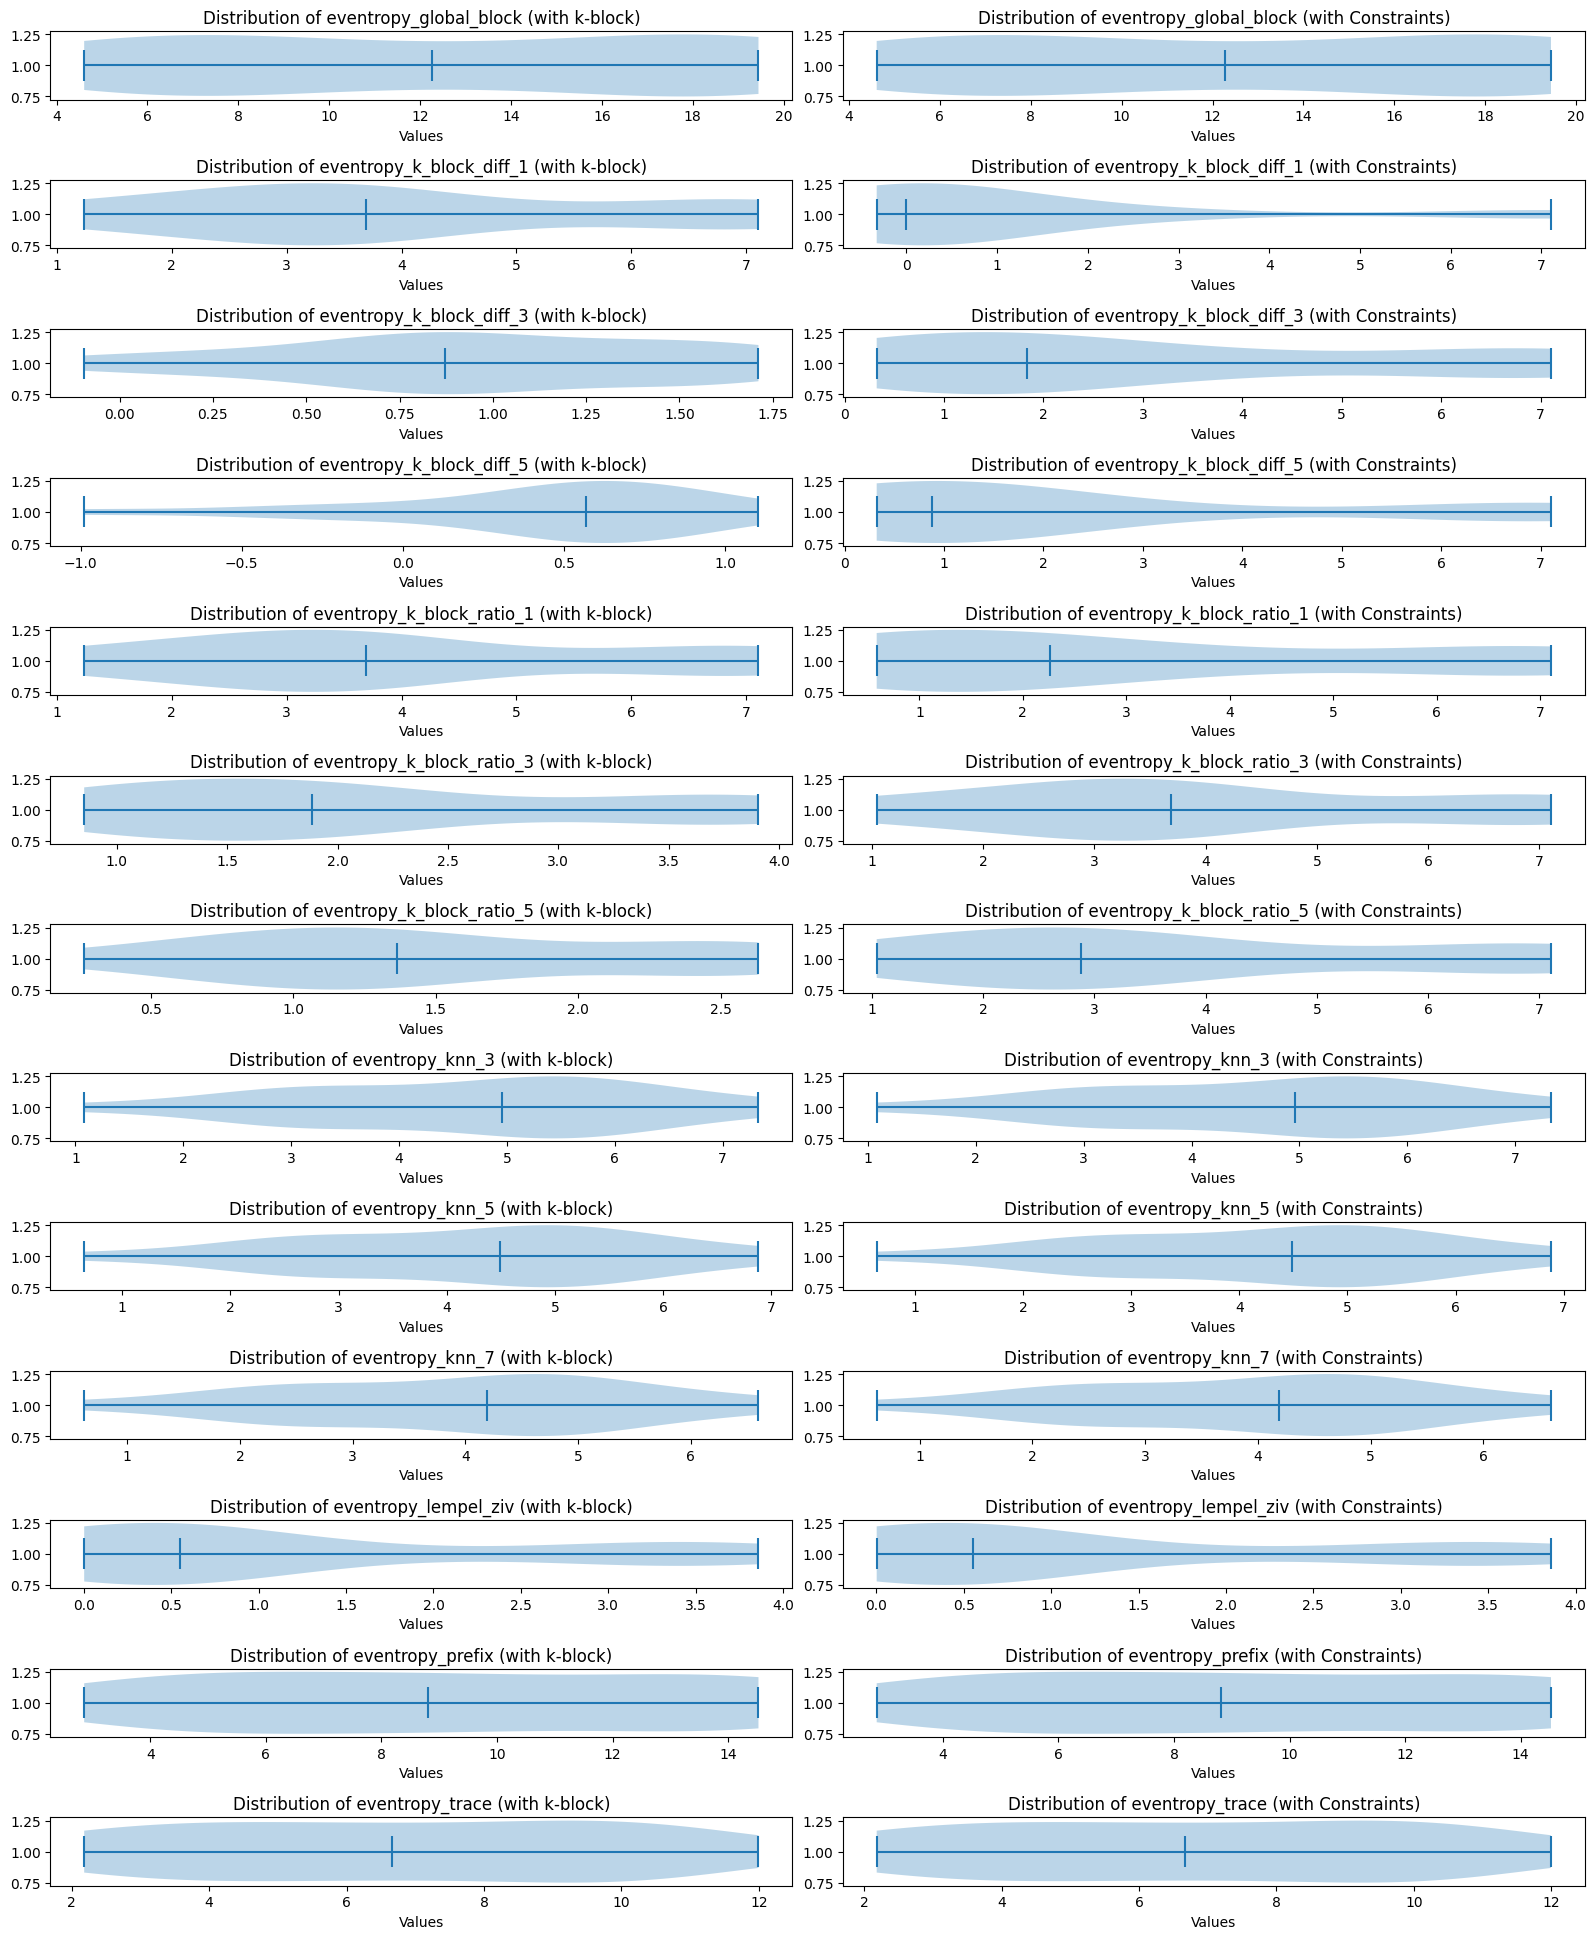

In [52]:
import matplotlib.pyplot as plt

# Your existing code...
unique_keys = entropy_results['Key'].unique()
unique_keys = unique_keys[(unique_keys != 'n_traces') & (unique_keys != 'n_variants')]

# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=len(unique_keys), ncols=2, figsize=(16, 1.5 * len(unique_keys)))

# Iterate over unique keys
for i, key in enumerate(unique_keys):
    # Plot each category's distribution on its own subplot for entropy results
    axes[i][0].violinplot(entropy_results[entropy_results['Key'] == key]['Value'], showmedians=True, vert=False)
    axes[i][0].set_title("Distribution of " + key + " (with k-block)")
    axes[i][0].set_xlabel('Values')  # Set x-label for the first subplot
    
    # Plot for bpic features
    axes[i][1].violinplot(bpic_results[bpic_results['Key'] == key]['Value'], showmedians=True, vert=False)
    axes[i][1].set_title("Distribution of " + key + " (with Constraints)")
    axes[i][1].set_xlabel('Values')  # Set x-label for the second subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Scatterplot of entropies wrt to unique traces

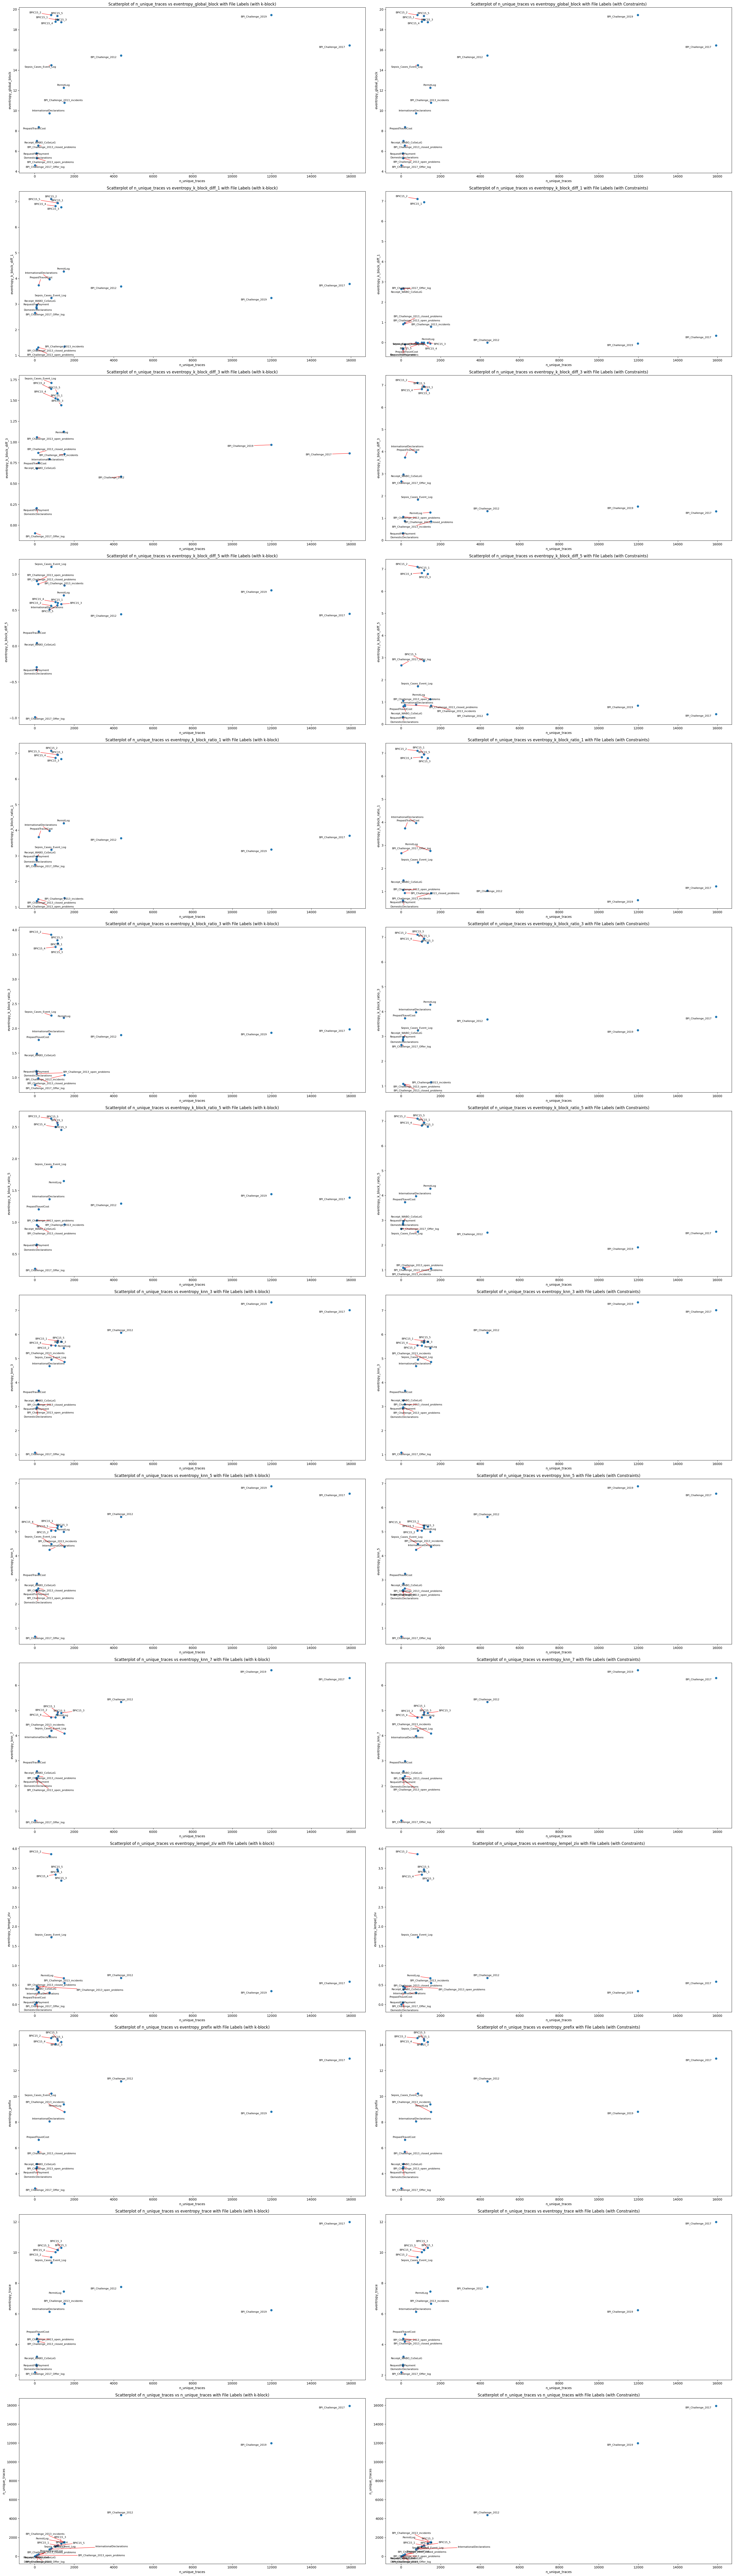

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

keys_needed = ['eventropy_global_block',
               'eventropy_k_block_diff_1', 'eventropy_k_block_diff_3',
               'eventropy_k_block_diff_5', 'eventropy_k_block_ratio_1',
               'eventropy_k_block_ratio_3', 'eventropy_k_block_ratio_5',
               'eventropy_knn_3', 'eventropy_knn_5', 'eventropy_knn_7',
               'eventropy_lempel_ziv', 
               'eventropy_prefix', 'eventropy_trace', 'n_variants']

fig, axis = plt.subplots(len(keys_needed), 2, figsize=(32, 8*(len(keys_needed))))



for i, name in enumerate(keys_needed):
    
    # for entropy results
    filtered_data = entropy_results[(entropy_results['Key'].isin(keys_needed))]
    # Pivot the DataFrame to have 'n_variants' and 'eventropy_trace' as columns
    pivot_data = filtered_data.pivot(index='File', columns='Key', values='Value')
    # Create a scatterplot
    axis[i][0].scatter(pivot_data['n_variants'], pivot_data[name])

    # Add labels for each point with smaller font size
    texts = [axis[i][0].text(x, y, file_name, ha='right', fontsize=8) for x, y, file_name in
             zip(pivot_data['n_variants'], pivot_data[name], pivot_data.index)]

    # Adjust the text labels to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'),ax=axis[i][0])

    # Add labels and title with smaller font size
    axis[i][0].set_xlabel('n_variants', fontsize=10)
    axis[i][0].set_ylabel(name, fontsize=10)
    axis[i][0].set_title(f'Scatterplot of n_variants vs {name} with File Labels (with k-block)', fontsize=12)
    
    # for bpic results
    filtered_data = bpic_results[(bpic_results['Key'].isin(keys_needed))]
    # Pivot the DataFrame to have 'n_variants' and 'eventropy_trace' as columns
    pivot_data = filtered_data.pivot(index='File', columns='Key', values='Value')
    # Create a scatterplot
    axis[i][1].scatter(pivot_data['n_variants'], pivot_data[name])

    # Add labels for each point with smaller font size
    texts = [axis[i][1].text(x, y, file_name, ha='right', fontsize=8) for x, y, file_name in
             zip(pivot_data['n_variants'], pivot_data[name], pivot_data.index)]

    # Adjust the text labels to avoid overlap
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'),ax=axis[i][1])

    # Add labels and title with smaller font size
    axis[i][1].set_xlabel('n_variants', fontsize=10)
    axis[i][1].set_ylabel(name, fontsize=10)
    axis[i][1].set_title(f'Scatterplot of n_variants vs {name} with File Labels (with Constraints)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Entropy valus for different files

better understanding plot

C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\117097617.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i][0].set_xticklabels(axis[i][0].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\117097617.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i][1].set_xticklabels(axis[i][1].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\117097617.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i][0].set_xticklabels(axis[i][0].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\117097617.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

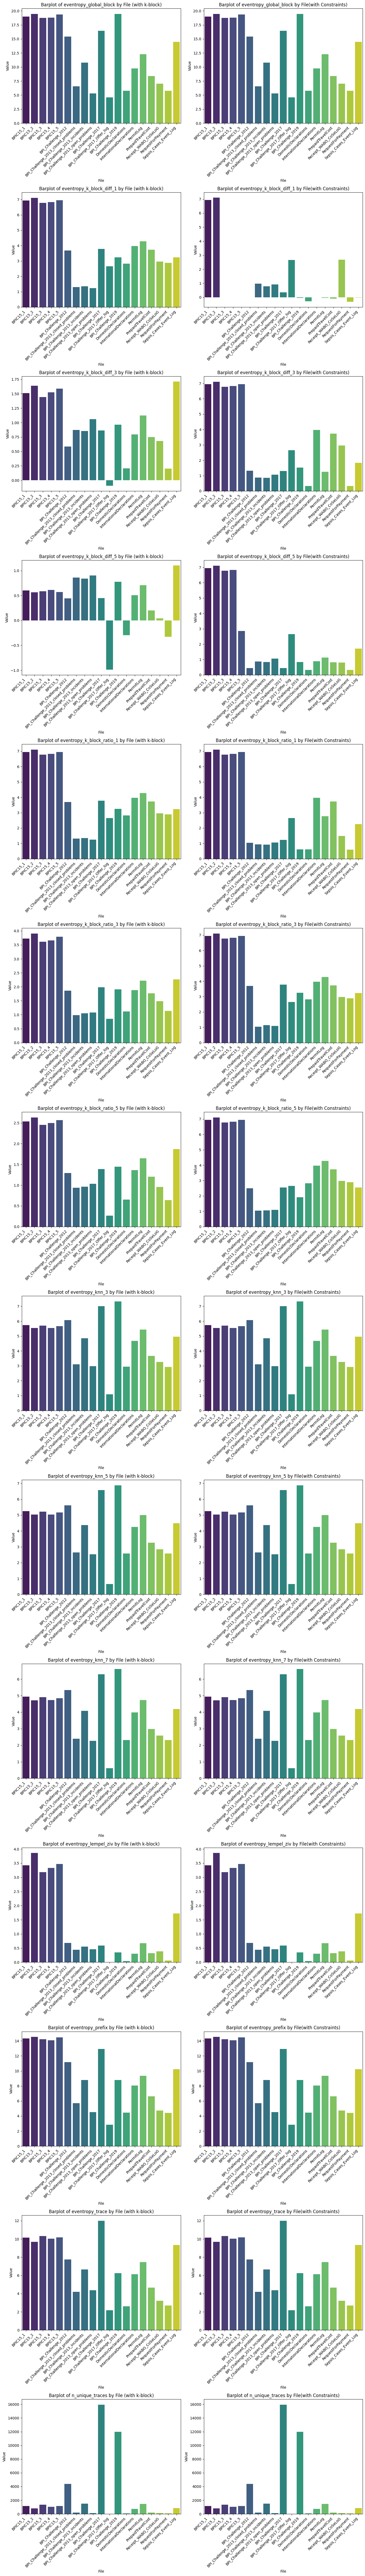

In [54]:
import seaborn as sns

fig, axis = plt.subplots(len(keys_needed), 2, figsize=(14, 7*(len(keys_needed))))

for i, name in enumerate(keys_needed):
    #for entropy features
    temp_df = entropy_results[entropy_results['Key'] == name][['File', 'Value']]
    temp_df = temp_df.sort_values(by='File')
    sns.barplot(data=temp_df, x='File', y='Value', palette='viridis', hue='File', ax=axis[i][0])

    # Rotate x-axis labels to make them horizontal
    axis[i][0].set_xticklabels(axis[i][0].get_xticklabels(), rotation=45, ha='right')
    axis[i][0].set_title(f'Barplot of {name} by File (with k-block)')
    
    #for bpic features
    temp_df = bpic_results[bpic_results['Key'] == name][['File', 'Value']]
    temp_df = temp_df.sort_values(by='File')
    sns.barplot(data=temp_df, x='File', y='Value', palette='viridis', hue='File', ax=axis[i][1])

    # Rotate x-axis labels to make them horizontal
    axis[i][1].set_xticklabels(axis[i][1].get_xticklabels(), rotation=45, ha='right')
    axis[i][1].set_title(f'Barplot of {name} by File(with Constraints)')

plt.tight_layout()
plt.show()


better looking plot

C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\104992206.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i][0].set_xticklabels(axis[i][0].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\104992206.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i][1].set_xticklabels(axis[i][1].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\104992206.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i][0].set_xticklabels(axis[i][0].get_xticklabels(), rotation=45, ha='right')
C:\Users\aniru\AppData\Local\Temp\ipykernel_11376\104992206.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

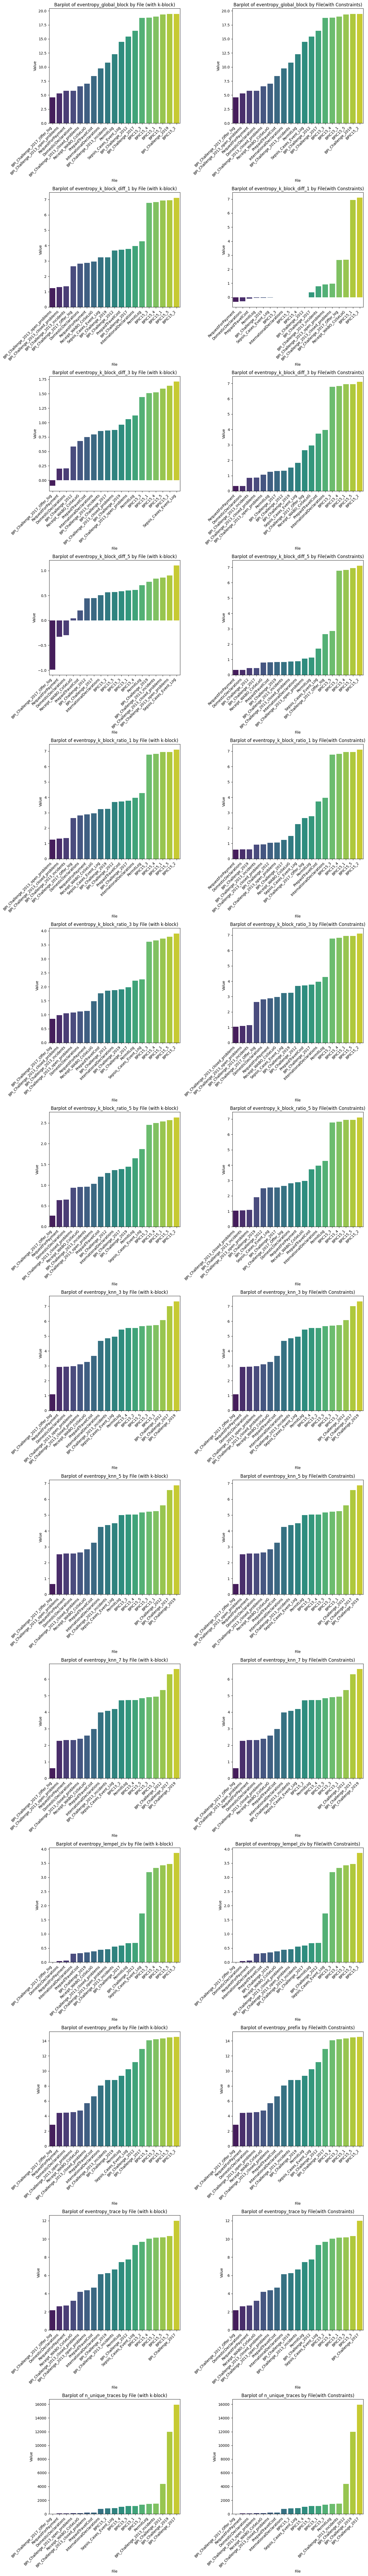

In [55]:
import seaborn as sns

fig, axis = plt.subplots(len(keys_needed), 2, figsize=(14, 7*(len(keys_needed))))

for i, name in enumerate(keys_needed):
    #for entropy features
    temp_df = entropy_results[entropy_results['Key'] == name][['File', 'Value']]
    temp_df = temp_df.sort_values(by='Value')
    sns.barplot(data=temp_df, x='File', y='Value', palette='viridis', hue='File', ax=axis[i][0])

    # Rotate x-axis labels to make them horizontal
    axis[i][0].set_xticklabels(axis[i][0].get_xticklabels(), rotation=45, ha='right')
    axis[i][0].set_title(f'Barplot of {name} by File (with k-block)')
    
    #for bpic features
    temp_df = bpic_results[bpic_results['Key'] == name][['File', 'Value']]
    temp_df = temp_df.sort_values(by='Value')
    sns.barplot(data=temp_df, x='File', y='Value', palette='viridis', hue='File', ax=axis[i][1])

    # Rotate x-axis labels to make them horizontal
    axis[i][1].set_xticklabels(axis[i][1].get_xticklabels(), rotation=45, ha='right')
    axis[i][1].set_title(f'Barplot of {name} by File(with Constraints)')

plt.tight_layout()
plt.show()
